In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df = df.drop(["Pclass", "Name", "Ticket", "Fare", "Cabin", "Embarked"], axis = 'columns')
df

,PassengerId,Survived,Sex,Age,SibSp,Parch
0,1,0,male,22.0,1,0
1,2,1,female,38.0,1,0
2,3,1,female,26.0,0,0
3,4,1,female,35.0,1,0
4,5,0,male,35.0,0,0
...,...,...,...,...,...,...
886,887,0,male,27.0,0,0
887,888,1,female,19.0,0,0
888,889,0,female,NaN,1,2
889,890,1,male,26.0,0,0


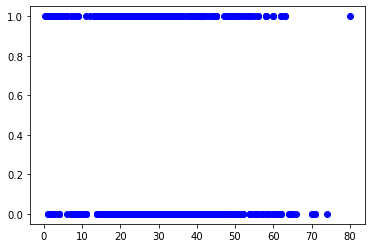

In [5]:
%matplotlib inline
plt.scatter(df['Age'], df['Survived'], color = 'blue')

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df.Sex)

In [20]:
df = df.drop(["Sex"], axis = 'columns')
df

,PassengerId,Survived,Age,SibSp,Parch,sex
0,1,0,22.0,1,0,1
1,2,1,38.0,1,0,0
2,3,1,26.0,0,0,0
3,4,1,35.0,1,0,0
4,5,0,35.0,0,0,1
...,...,...,...,...,...,...
886,887,0,27.0,0,0,1
887,888,1,19.0,0,0,0
888,889,0,NaN,1,2,0
889,890,1,26.0,0,0,1


In [30]:
import math
m = df["Age"].mean()
m = math.ceil(m)
df = df.fillna(30)
df

,PassengerId,Survived,Age,SibSp,Parch,sex
0,1,0,22.0,1,0,1
1,2,1,38.0,1,0,0
2,3,1,26.0,0,0,0
3,4,1,35.0,1,0,0
4,5,0,35.0,0,0,1
...,...,...,...,...,...,...
886,887,0,27.0,0,0,1
887,888,1,19.0,0,0,0
888,889,0,30.0,1,2,0
889,890,1,26.0,0,0,1


In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df[["PassengerId", "Age", "sex"]], df[["Survived"]])

C:\Users\MANROOP SINGH\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [53]:
df_test = pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [67]:
m = df_test["Age"].mean()
m = math.ceil(m)
df_test = df_test.fillna(30)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,30,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,30,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,30,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,30,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,30,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,30,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,30,S
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,30,S


In [68]:
df_test['sex'] = le.fit_transform(df_test['Sex'])
df_test = df_test.drop(['Sex'], axis = "columns")
df_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,30,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,30,S,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,30,Q,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,30,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,30,S,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",30.0,0,0,A.5. 3236,8.0500,30,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,30,S,1
416,1308,3,"Ware, Mr. Frederick",30.0,0,0,359309,8.0500,30,S,1


In [69]:
df_test['Survived'] = model.predict(df_test[["PassengerId", "Age", "sex"]])

In [70]:
df_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex,Survived
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,30,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,30,S,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,30,Q,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,30,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,30,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",30.0,0,0,A.5. 3236,8.0500,30,S,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,C,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,30,S,1,0
416,1308,3,"Ware, Mr. Frederick",30.0,0,0,359309,8.0500,30,S,1,0


In [71]:
df["final prediction"] = model.predict(df[["PassengerId", "Age", "sex"]])
df

,PassengerId,Survived,Age,SibSp,Parch,sex,final prediction
0,1,0,22.0,1,0,1,0
1,2,1,38.0,1,0,0,1
2,3,1,26.0,0,0,0,1
3,4,1,35.0,1,0,0,1
4,5,0,35.0,0,0,1,0
...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,1,0
887,888,1,19.0,0,0,0,1
888,889,0,30.0,1,2,0,1
889,890,1,26.0,0,0,1,0


In [72]:
model.score(df[["PassengerId", "Age", "sex"]], df[["final prediction"]])

1.0

In [73]:
df_final = df_test[["PassengerId", "Survived"]]
df_final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[["PassengerId", "Age", "sex"]], df[["Survived"]], test_size = 0.2)

In [76]:
m = LogisticRegression()
m.fit(X_train, y_train)

C:\Users\MANROOP SINGH\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [77]:
m.score(X_test, y_test)

0.8044692737430168

In [79]:
df_final.to_csv("Final_prediction.csv", index = False)